In [1]:
import numpy as np
from scipy.special import comb
from scipy import stats
import matplotlib.pyplot as plt

rng = np.random.default_rng()

In [2]:
def P(t, w, p):
    return comb(t, w) * p**w * (1 - p) ** (t - w)


def R(t, w, G, L):
    return (1 + G) ** w * (1 + L) ** (t - w)


def E_R(t, G, L, p):
    sum = 0
    for w in range(t + 1):
        sum += P(t, w, p) * R(t, w, G, L)
    return sum

In [3]:
def E_R_s(t, G, L, p):
    return ((1 + G) ** p * (1 + L) ** (1 - p)) ** t

In [4]:
def sim_path(T, G, L, p):
    game_hist = rng.choice([1.0, 0.0], T, p=[p, 1 - p])
    game_hist[game_hist == 1] = 1 + G
    game_hist[game_hist == 0] = 1 + L
    return np.cumprod(game_hist)

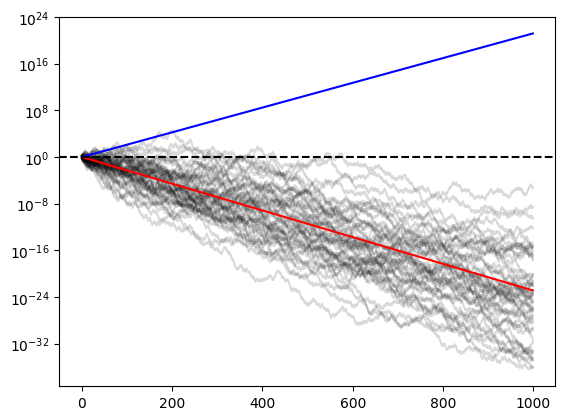

In [5]:
G = 0.5
L = -0.4
p = 0.5

plt.plot(
    np.array([sim_path(1000, G, L, p) for x in range(50)]).T, color="black", alpha=0.15
)
plt.plot([E_R_s(t, G, L, p) for t in range(1000)], color="red")
plt.plot([E_R(t, G, L, p) for t in range(1000)], color="blue")
plt.axhline(1, color="black", linestyle="dashed")
plt.yscale("log")

In [6]:
def W_BE(t, G, L):
    return -t * np.log(1 + L) / (np.log(1 + G) - np.log(1 + L))

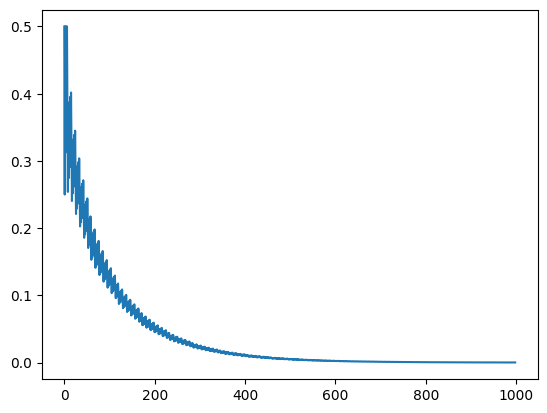

In [7]:
plt.plot([1 - stats.binom.cdf(k=W_BE(n, G, L), n=n, p=p) for n in range(1, 1000)])

In [8]:
def calc_wealths(t, G, L):
    w_be = W_BE(t, G, L)
    winning_wealth = []
    losing_wealth = []
    for w in range(t + 1):
        if w < w_be:
            losing_wealth.append(R(t, w, G, L))
        else:
            winning_wealth.append(R(t, w, G, L))
    return np.mean(winning_wealth), np.mean(losing_wealth)

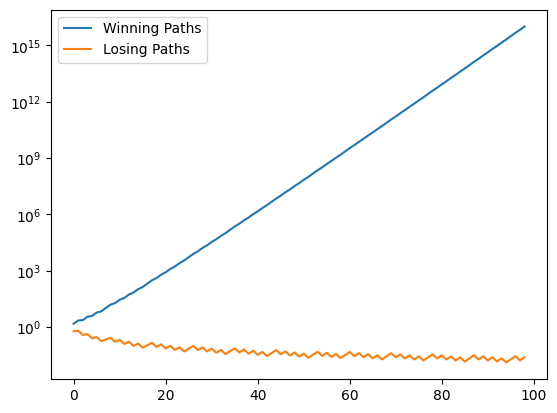

In [9]:
wealths = [calc_wealths(t, G, L) for t in range(1, 100)]

plt.plot([x[0] for x in wealths])
plt.plot([x[1] for x in wealths])
plt.legend(["Winning Paths", "Losing Paths"])
plt.yscale("log")

In [22]:
t = 100

results = []
for w in range(t+1):
    path_prob = P(t, w, p)
    path_wealth = R(t, w, G, L)
    results.append(path_prob * path_wealth)

In [23]:
# Verifying that mean estimates agree
print(np.sum(results))
print(E_R(t, G, L, p))

131.50125784630328
131.5012578463032


In [24]:
mode = ((1-p) * (1+L) - t * p * (1+G)) / (-p*(1+G) - (1-p)*(1+L))

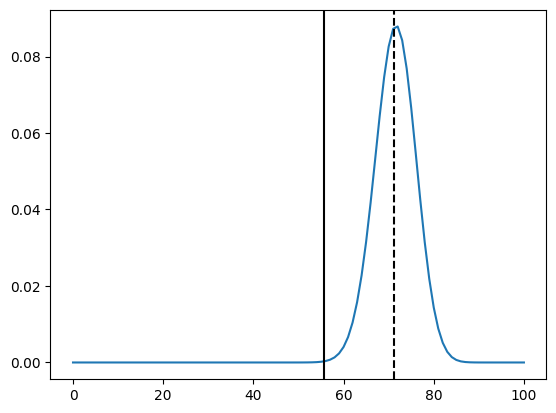

In [25]:
plt.plot(range(t+1), np.array(results) / np.sum(results))
plt.axvline(W_BE(t, G, L), color="black")
plt.axvline(mode, linestyle="dashed", color="black")

In [30]:
(p * (1+G)) / (p*(1+G) + (1-p)*(1+L))

0.7142857142857143